# Analyzing Hollywood movies by gender dialogue

### Import dataset 

In [1]:
import pandas as pd

movies = pd.read_csv('merged.csv', delimiter=',', encoding='utf-8')
movies = movies.drop(columns="script_id")
movies

,imdb_character_name,words,gender,age,imdb_id,title,year,gross,prop_dialogue
0,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,0.048639
1,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.136534
2,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.021583
3,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.352049
4,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.029715
...,...,...,...,...,...,...,...,...,...
23043,lumiere,1063,m,56.0,tt0101414,Beauty and the Beast,1991,452.0,0.104636
23044,maurice,1107,m,71.0,tt0101414,Beauty and the Beast,1991,452.0,0.108967
23045,monsieur d'arqu,114,m,58.0,tt0101414,Beauty and the Beast,1991,452.0,0.011222
23046,mrs. potts,564,f,66.0,tt0101414,Beauty and the Beast,1991,452.0,0.055517


### Clean Data

In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23048 entries, 0 to 23047
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   imdb_character_name  23046 non-null  object 
 1   words                23048 non-null  int64  
 2   gender               23048 non-null  object 
 3   age                  18263 non-null  float64
 4   imdb_id              23048 non-null  object 
 5   title                23048 non-null  object 
 6   year                 23048 non-null  int64  
 7   gross                19387 non-null  float64
 8   prop_dialogue        23048 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ MB


In [3]:
movies.describe()

,words,age,year,gross,prop_dialogue
count,23048.000000,18263.000000,23048.000000,19387.00000,23048.000000
mean,907.871486,42.382960,1998.133070,106.73637,0.086515
std,1399.593759,59.718859,14.746058,145.85823,0.107745
min,101.000000,3.000000,1929.000000,0.00000,0.001537
25%,193.000000,30.000000,1992.000000,22.00000,0.019771
50%,396.000000,39.000000,2001.000000,56.00000,0.042421
75%,980.000000,50.000000,2009.000000,136.00000,0.104166
max,28102.000000,2013.000000,2015.000000,1798.00000,0.923422


In [4]:
# Find data mistakes and fix them
movies[movies['age'] == 2013]
# Drop using the index number
movies = movies.drop(index=11639)
movies

,imdb_character_name,words,gender,age,imdb_id,title,year,gross,prop_dialogue
0,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,0.048639
1,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.136534
2,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.021583
3,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.352049
4,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.029715
...,...,...,...,...,...,...,...,...,...
23043,lumiere,1063,m,56.0,tt0101414,Beauty and the Beast,1991,452.0,0.104636
23044,maurice,1107,m,71.0,tt0101414,Beauty and the Beast,1991,452.0,0.108967
23045,monsieur d'arqu,114,m,58.0,tt0101414,Beauty and the Beast,1991,452.0,0.011222
23046,mrs. potts,564,f,66.0,tt0101414,Beauty and the Beast,1991,452.0,0.055517


In [8]:
# Drop irrelevant columns
movies = movies.drop(columns='imdb_id')
movies

,character,words,gender,age,title,year,gross,prop_dialogue
0,betty,311,f,35.0,The Bridges of Madison County,1995,142.0,0.048639
1,carolyn johnson,873,f,NaN,The Bridges of Madison County,1995,142.0,0.136534
2,eleanor,138,f,NaN,The Bridges of Madison County,1995,142.0,0.021583
3,francesca johns,2251,f,46.0,The Bridges of Madison County,1995,142.0,0.352049
4,madge,190,f,46.0,The Bridges of Madison County,1995,142.0,0.029715
...,...,...,...,...,...,...,...,...
23043,lumiere,1063,m,56.0,Beauty and the Beast,1991,452.0,0.104636
23044,maurice,1107,m,71.0,Beauty and the Beast,1991,452.0,0.108967
23045,monsieur d'arqu,114,m,58.0,Beauty and the Beast,1991,452.0,0.011222
23046,mrs. potts,564,f,66.0,Beauty and the Beast,1991,452.0,0.055517


In [9]:
# Rename clunky column names
movies = movies.rename(columns={"imdb_character_name":"character"})
movies

,character,words,gender,age,title,year,gross,prop_dialogue
0,betty,311,f,35.0,The Bridges of Madison County,1995,142.0,0.048639
1,carolyn johnson,873,f,NaN,The Bridges of Madison County,1995,142.0,0.136534
2,eleanor,138,f,NaN,The Bridges of Madison County,1995,142.0,0.021583
3,francesca johns,2251,f,46.0,The Bridges of Madison County,1995,142.0,0.352049
4,madge,190,f,46.0,The Bridges of Madison County,1995,142.0,0.029715
...,...,...,...,...,...,...,...,...
23043,lumiere,1063,m,56.0,Beauty and the Beast,1991,452.0,0.104636
23044,maurice,1107,m,71.0,Beauty and the Beast,1991,452.0,0.108967
23045,monsieur d'arqu,114,m,58.0,Beauty and the Beast,1991,452.0,0.011222
23046,mrs. potts,564,f,66.0,Beauty and the Beast,1991,452.0,0.055517


In [11]:
# Since NaN is a float in pandas and we can't work with floats, fill in NaNs
movies['character'] = movies['character'].fillna('No character info')

,character,words,gender,age,title,year,gross,prop_dialogue
0,betty,311,f,35.0,The Bridges of Madison County,1995,142.0,0.048639
1,carolyn johnson,873,f,NaN,The Bridges of Madison County,1995,142.0,0.136534
2,eleanor,138,f,NaN,The Bridges of Madison County,1995,142.0,0.021583
3,francesca johns,2251,f,46.0,The Bridges of Madison County,1995,142.0,0.352049
4,madge,190,f,46.0,The Bridges of Madison County,1995,142.0,0.029715
...,...,...,...,...,...,...,...,...
23043,lumiere,1063,m,56.0,Beauty and the Beast,1991,452.0,0.104636
23044,maurice,1107,m,71.0,Beauty and the Beast,1991,452.0,0.108967
23045,monsieur d'arqu,114,m,58.0,Beauty and the Beast,1991,452.0,0.011222
23046,mrs. potts,564,f,66.0,Beauty and the Beast,1991,452.0,0.055517


In [16]:
# Transform character names into Title Case
def title_case(input: str) -> str:
    return input.title()

movies['character'] = movies['character'].apply(title_case)
movies

,character,words,gender,age,title,year,gross,prop_dialogue
0,Betty,311,f,35.0,The Bridges of Madison County,1995,142.0,0.048639
1,Carolyn Johnson,873,f,NaN,The Bridges of Madison County,1995,142.0,0.136534
2,Eleanor,138,f,NaN,The Bridges of Madison County,1995,142.0,0.021583
3,Francesca Johns,2251,f,46.0,The Bridges of Madison County,1995,142.0,0.352049
4,Madge,190,f,46.0,The Bridges of Madison County,1995,142.0,0.029715
...,...,...,...,...,...,...,...,...
23043,Lumiere,1063,m,56.0,Beauty and the Beast,1991,452.0,0.104636
23044,Maurice,1107,m,71.0,Beauty and the Beast,1991,452.0,0.108967
23045,Monsieur D'Arqu,114,m,58.0,Beauty and the Beast,1991,452.0,0.011222
23046,Mrs. Potts,564,f,66.0,Beauty and the Beast,1991,452.0,0.055517


### Begin Analysis

In [32]:
# Percent of female character dialogues, greatest to smallest
# Make into DF with .reset_index()
female_filter = movies['gender'] == 'f'
female_movies = movies[female_filter].groupby('title').sum('prop_dialogue').sort_values(by='prop_dialogue', ascending=False)[['prop_dialogue']].reset_index()
female_movies = female_movies.rename(columns={"prop_dialogue": "female_dialogue"})
female_movies


,title,female_dialogue
0,The Descent,1.000000
1,Now and Then,1.000000
2,Precious,0.993541
3,Martyrs,0.965550
4,The Hand That Rocks the Cradle,0.933750
...,...,...
1935,The Last Castle,0.011139
1936,The Damned United,0.010909
1937,Thirteen Days,0.010834
1938,Men in Black 3,0.007812


In [33]:
male_filter = movies['gender'] == 'm'
male_movies = movies[male_filter].groupby('title').sum('prop_dialogue').sort_values(by='prop_dialogue', ascending=False)[['prop_dialogue']].reset_index()
male_movies = male_movies.rename(columns={"prop_dialogue": "male_dialogue"})
male_movies


,title,male_dialogue
0,Duel,1.000000
1,Mala Noche,1.000000
2,The Battle of Algiers,1.000000
3,Apollo 18,1.000000
4,Runner Runner,1.000000
...,...,...
1987,Heavenly Creatures,0.080632
1988,Agnes of God,0.077518
1989,The Hand That Rocks the Cradle,0.066250
1990,Martyrs,0.034450


In [44]:
merged = pd.merge(female_movies, male_movies, on='title', how='outer')
merged

,title,female_dialogue,male_dialogue
0,The Descent,1.000000,NaN
1,Now and Then,1.000000,NaN
2,Precious,0.993541,0.006459
3,Martyrs,0.965550,0.034450
4,The Hand That Rocks the Cradle,0.933750,0.066250
...,...,...,...
1989,"Lock, Stock and Two Smoking Barrels",NaN,1.000000
1990,Platoon,NaN,1.000000
1991,The Hunt for Red October,NaN,1.000000
1992,The Thin Red Line,NaN,1.000000


In [48]:
# Fill NaN data with 0
merged['female_dialogue'] = merged['female_dialogue'].fillna(0)
merged['male_dialogue'] = merged['male_dialogue'].fillna(0)
merged

,title,female_dialogue,male_dialogue
0,The Descent,1.000000,0.000000
1,Now and Then,1.000000,0.000000
2,Precious,0.993541,0.006459
3,Martyrs,0.965550,0.034450
4,The Hand That Rocks the Cradle,0.933750,0.066250
...,...,...,...
1989,"Lock, Stock and Two Smoking Barrels",0.000000,1.000000
1990,Platoon,0.000000,1.000000
1991,The Hunt for Red October,0.000000,1.000000
1992,The Thin Red Line,0.000000,1.000000


<Axes: title={'center': 'Hollywood movies by percentage of gender dialogue'}, xlabel='Percentage of dialogue'>

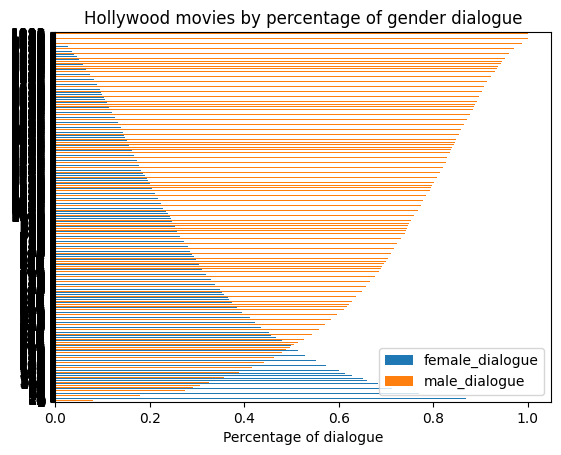

In [54]:
temp = merged.drop(columns='title') 
temp.plot(kind='barh', title= 'Hollywood movies by percentage of gender dialogue', xlabel='Percentage of dialogue')